In [11]:
#Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted")

#Load CSV

data = pd.read_csv('breast-cancer-wisconsin.data.csv')
temp = data
data.head()

,id,slump_thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [12]:
data.Class[data.Class == 2] = "B" 
data.Class[data.Class == 4] = "M" 

print "Features considered are: "
print "-------------------------"
for col in data.columns:
    print col
    
temp =data


Features considered are: 
-------------------------
id
slump_thickness
Uniformity_of_Cell_Size
Uniformity_of_Cell_Shape
Marginal_Adhesion
Single_Epithelial_Cell_Size
Bare_Nuclei
Bland_Chromatin
Normal_Nucleoli
Mitoses
Class


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Number of Benign:  458
Number of Malignant :  241


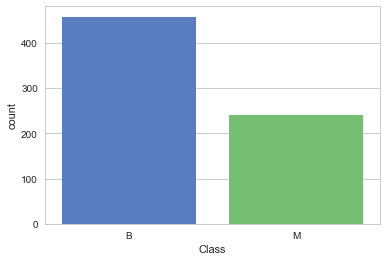

In [13]:
y = data['Class']
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print 'Number of Benign: ',B
print 'Number of Malignant : ',M

In [14]:
features_not_required = ['id','Class']
x = data.drop(features_not_required,axis = 1 )
x.describe()

,slump_thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


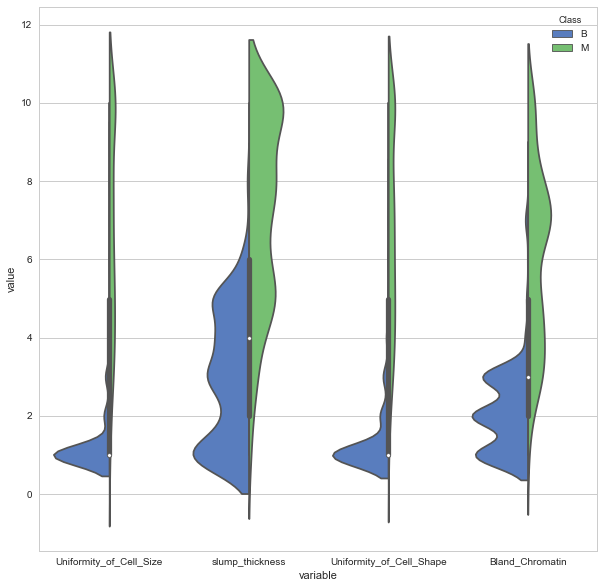

In [15]:
df = pd.melt(data, id_vars=['Class'], value_vars=['Uniformity_of_Cell_Size', 'slump_thickness', 'Uniformity_of_Cell_Shape','Bland_Chromatin'])
plt.figure(figsize=(10,10))
sns.violinplot(x='variable', y='value', hue='Class', data=df, split=True)
plt.show()

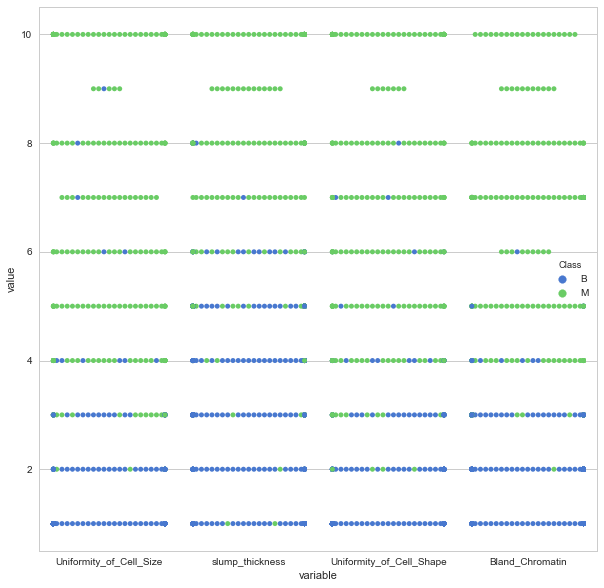

In [10]:
plt.figure(figsize=(10,10))
sns.swarmplot(x='variable', y='value', hue='Class', data=df)
plt.show()

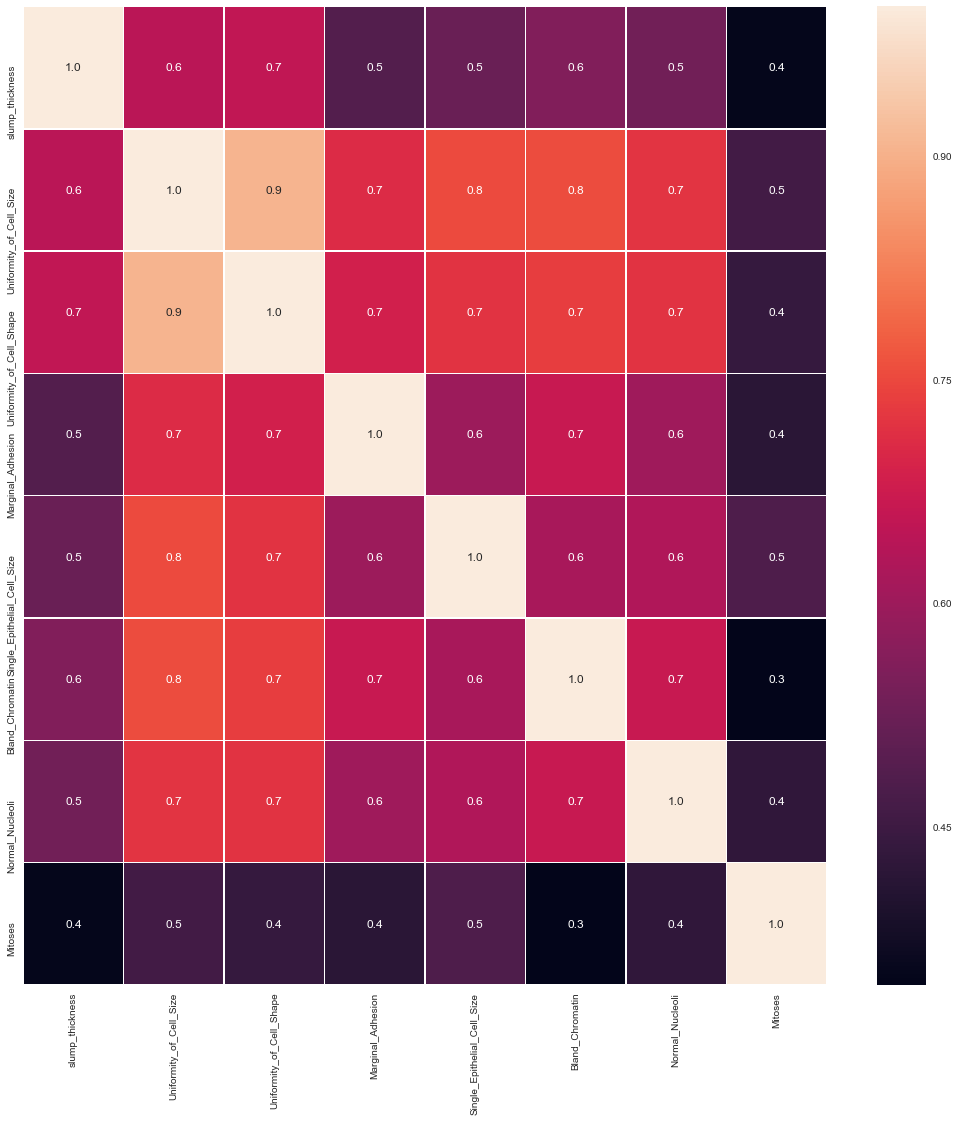

In [16]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)